# Project: Wrangling and Analyze Data

## Data Gathering

In [152]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
from IPython.display import Image
import os
import json
import re
import plotly.express as px

In [2]:
# Loading the twitter dataset in a dataframe
df_tweet = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Create a new folder if no folder exists
folder_name = 'my_project'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)

### Downloading the image predictions file from the internet using request library

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

### Loading the downloaded image file into a dataframe

In [5]:
df_image_prediction = pd.read_csv('my_project/image-predictions.tsv', sep='\t')

## Accessing Data from twitter Api

In [6]:
consumer_key =  'HIDDEN' #Api_key
consumer_secret = 'HIDDEN' #Api_key_secret
access_token = 'HIDDEN' 
access_secret = 'HIDDEN'

### Reading the tweet_json file retrieved from twitter api into an empty list

In [7]:
df_tweet_list = []

with open('tweet_json.txt', 'r') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        df_tweet_list.append({
        "tweet_id" : tweet_id,
        "retweet_count" : retweet_count,
        "favorite_count" : favorite_count
          })
              

### Loading the tweet list into a dataframe

In [8]:
df_tweet_api = pd.DataFrame(df_tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data

In [9]:
df_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
df_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
df_tweet_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7018,33838
1,892177421306343426,5303,29356
2,891815181378084864,3486,22067
3,891689557279858688,7232,36969
4,891327558926688256,7771,35343
...,...,...,...
2322,666049248165822465,37,89
2323,666044226329800704,115,246
2324,666033412701032449,36,99
2325,666029285002620928,39,112


In [12]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df_tweet_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [15]:
df_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
df_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
df_tweet_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2473.704770,7060.311130
std,6.820795e+16,4189.414789,10971.723882
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,495.000000,1225.500000
50%,7.178418e+17,1149.000000,3053.000000
75%,7.986547e+17,2864.500000,8611.500000
max,8.924206e+17,70826.000000,145016.000000


### Checking for missing data

In [18]:
df_tweet.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [19]:
df_tweet.isna().mean()

tweet_id                      0.000000
in_reply_to_status_id         0.966893
in_reply_to_user_id           0.966893
timestamp                     0.000000
source                        0.000000
text                          0.000000
retweeted_status_id           0.923175
retweeted_status_user_id      0.923175
retweeted_status_timestamp    0.923175
expanded_urls                 0.025042
rating_numerator              0.000000
rating_denominator            0.000000
name                          0.000000
doggo                         0.000000
floofer                       0.000000
pupper                        0.000000
puppo                         0.000000
dtype: float64

### Using the library missingno to visualize the columns with most missing rows in df_tweet

<AxesSubplot:>

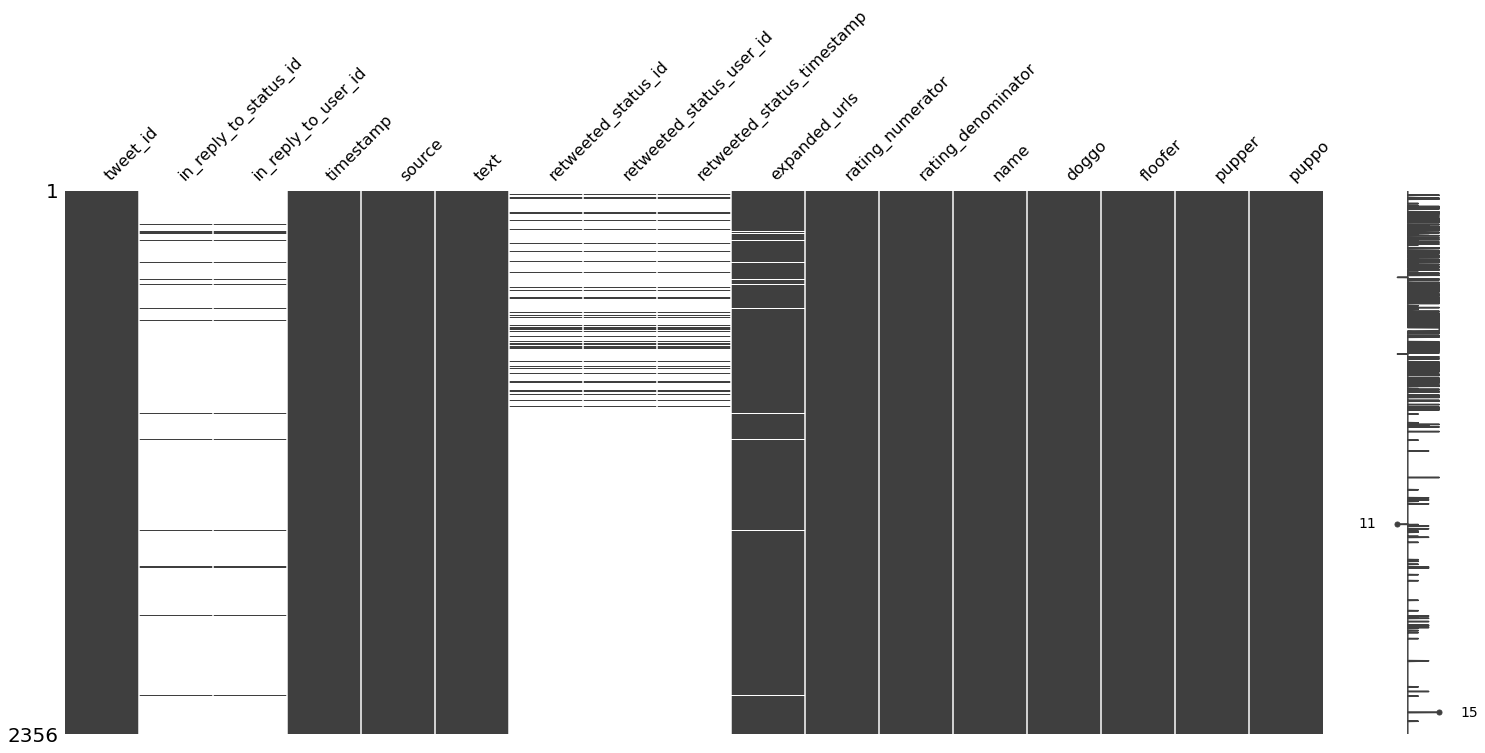

In [20]:
import missingno as msno
msno.matrix(df_tweet.iloc[:, :17])

The white spaces in the above plot shows there are too many missing rows across the columns **in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**. While the column **expanded_url** has fewer rows missing.

In [21]:
df_image_prediction.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [22]:
df_tweet_api.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Checking for duplicates

In [23]:
df_tweet.duplicated().any()

False

In [24]:
df_image_prediction.duplicated().any()

False

In [25]:
df_tweet_api.duplicated().any()

False

In [26]:
sum(df_tweet['source'].duplicated())

2352

In [27]:
df_tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

From the result above it shows a lot of tweets came from Iphone users alone

In [28]:
sum(df_tweet['expanded_urls'].duplicated())

137

There 137 duplicated urls in the expanded_urls column

In [29]:
df_tweet['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/739238157791694849/video/1                                                                                                                                    2
https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1    2
https://twitter.com/dog_rates/status/810254108431155201/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/839549326359670784/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1                                                                    2
               

There are rows in the expanded_urls column with duplicated urls separated by comma `,`

In [30]:
sum(df_image_prediction['jpg_url'].duplicated())

66

In [31]:
df_image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg    2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg    2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg    2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg    2
https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg    2
                                                  ..
https://pbs.twimg.com/media/CXqcOHCUQAAugTB.jpg    1
https://pbs.twimg.com/media/CWUZpydWcAAeipD.jpg    1
https://pbs.twimg.com/media/CZNj8N-WQAMXASZ.jpg    1
https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg    1
https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

There are about 66 duplicated urls in jpg_url

In [32]:
df_image_false = df_image_prediction[(df_image_prediction.p1_dog == False) &
                                     (df_image_prediction.p2_dog == False) & 
                                     (df_image_prediction.p3_dog == False)] 
df_image_false.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
471,675135153782571009,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False
1142,729854734790754305,https://pbs.twimg.com/media/CiD3AfkXEAA3S_r.jpg,1,doormat,0.359586,False,china_cabinet,0.053901,False,passenger_car,0.052665,False
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
761,688894073864884227,https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg,1,hog,0.669996,False,guinea_pig,0.077347,False,hamster,0.062398,False
948,704819833553219584,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,guinea_pig,0.994776,False,hamster,0.004069,False,wood_rabbit,0.000206,False
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
195,669583744538451968,https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg,1,candle,0.174315,False,lampshade,0.120407,False,plunger,0.072099,False
615,680176173301628928,https://pbs.twimg.com/media/CXB4nWnWEAAhLTX.jpg,1,Christmas_stocking,0.207547,False,mask,0.193880,False,feather_boa,0.152738,False
424,674063288070742018,https://pbs.twimg.com/media/CVrA-rIWEAANxwQ.jpg,1,ostrich,0.661176,False,bearskin,0.214879,False,swab,0.064456,False
733,686749460672679938,https://pbs.twimg.com/media/CYfS75fWAAAllde.jpg,1,cheeseburger,0.643808,False,hotdog,0.201378,False,bagel,0.063880,False


In [33]:
df_image_false.shape

(324, 12)

There are 324 entries in the image prediction dataset with `p1_dog`, `p2_dog`, `p3_dog` values as False

In [34]:
df_tweet['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [35]:
df_tweet['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

There are a lot of outliers in the `rating_numerator` and `rating_denominator`. This could be as a result of the unique rating system

In [36]:
df_replies = df_tweet[df_tweet['in_reply_to_status_id'].isna() == False]
df_replies.shape

(78, 17)

In [37]:
df_retweets = df_tweet[df_tweet['retweeted_status_id'].isna() == False]
df_retweets.shape

(181, 17)

There are 78 reply tweets and 181 tweets that are retweets in the dataset. 

In [38]:
df_tweet.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Swagger      1
Glenn        1
Jersey       1
my           1
Andy         1
Name: name, Length: 957, dtype: int64

There are letters used as names in the `name` column

### Quality issues

```df_tweet ``` table

1. Erroneous datatypes (`timestamp` column)

2. There are rows in the `expanded_urls` column with missing data and rows with duplicated urls separated by comma `,`

3. Irrelevant columns with missing data ( `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp`) since our analysis does not involve retweets and replies, only original tweets. These columns will be dropped 

4. Inaccurate values ( name column ) names witten as `None`, `a`, `by`, `very`. After visual assessment I observed that real Dog names are in uppercase.

`df_image_prediction` table

5. Inconsistent values in `p1`, `p2`, `p3` columns (some values are in Uppercase while some are in lowercase)

6. There are rows where `p1_dog`, `p2_dog`, `p3_dog` are False. This indicates that the image is not that of a dog

7. There are duplicated urls in the `jpg_url` column

8. The `img_num` column is irrelevant as it does not improve our analysis


### Tidiness issues
1. One variable in two columns `rating_numerator` and `rating_denominator` (ratings)

2. `df_tweet`, `df_tweet_api` and `df_image_prediction` should be joined as one table to form a single observational unit

3. One variable in four columns `doggo`, `floofer`, `pupper`, `puppo`  (dog_stages)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [39]:
# Make copies of original pieces of data
tweet_clean = df_tweet.copy()
tweet_api_clean = df_tweet_api.copy()
image_clean = df_image_prediction.copy()

### Missing Data:

**`df_tweet`**: There are rows in the `expanded_urls` column with missing data and rows with duplicated urls separated by comma ,

#### Define: Remove rows with null values, duplicates and split the rows with two urls separated by comma

#### Code

In [40]:
# Removing rows with null values
tweet_clean = tweet_clean[tweet_clean['expanded_urls'].isna() == False ]

In [41]:
# Splitting the urls separated with comma and picking the first index
tweet_clean['expanded_urls'] = tweet_clean['expanded_urls'].str.split(',').str[0]


In [42]:
# Dropping duplicated expanded_urls
tweet_clean.drop_duplicates(subset=['expanded_urls'], inplace=True)

#### Test

In [43]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2140 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2140 non-null   object 
 4   source                      2140 non-null   object 
 5   text                        2140 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2140 non-null   object 
 10  rating_numerator            2140 non-null   int64  
 11  rating_denominator          2140 non-null   int64  
 12  name                        2140 non-null   object 
 13  doggo                       2140 

In [44]:
tweet_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/670792680469889025/photo/1    1
https://twitter.com/dog_rates/status/734912297295085568/photo/1    1
https://twitter.com/dog_rates/status/674767892831932416/photo/1    1
https://twitter.com/dog_rates/status/695816827381944320/photo/1    1
https://twitter.com/dog_rates/status/731156023742988288/photo/1    1
                                                                  ..
https://twitter.com/dog_rates/status/870063196459192321/photo/1    1
https://twitter.com/dog_rates/status/757741869644341248/photo/1    1
https://twitter.com/dog_rates/status/690735892932222976/photo/1    1
https://twitter.com/dog_rates/status/667177989038297088/photo/1    1
https://twitter.com/dog_rates/status/739238157791694849/video/1    1
Name: expanded_urls, Length: 2140, dtype: int64

In [45]:
sum(tweet_clean.expanded_urls.duplicated())

0

In [46]:
tweet_clean.shape

(2140, 17)

### Irrelevant data: 

`df_tweet`: Irrelevant columns with missing data (**in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**) since our analysis does not involve retweets and replies, only original tweets. These columns will be dropped

#### Define
- Join tweet_clean and tweet_api_clean dataframes together
- Drop irrelevant columns and missing data (**in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**) so we are left with original tweets

#### Code

In [47]:
# Merging tweet_clean and tweet_api_clean dataframes together
df_combined_tweet = pd.merge(tweet_clean, tweet_api_clean, on="tweet_id", how="left")

In [48]:
# Filter the original tweets
df_original_tweet = df_combined_tweet[(df_combined_tweet['retweeted_status_id'].isnull()) &
                                     (df_combined_tweet['in_reply_to_status_id'].isnull())]

In [49]:
# drop the irrelevant columns
df_original_tweet = df_original_tweet.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                            'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [50]:
df_combined_tweet.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140 entries, 0 to 2139
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2140 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2140 non-null   object 
 4   source                      2140 non-null   object 
 5   text                        2140 non-null   object 
 6   retweeted_status_id         180 non-null    float64
 7   retweeted_status_user_id    180 non-null    float64
 8   retweeted_status_timestamp  180 non-null    object 
 9   expanded_urls               2140 non-null   object 
 10  rating_numerator            2140 non-null   int64  
 11  rating_denominator          2140 non-null   int64  
 12  name                        2140 non-null   object 
 13  doggo                       2140 

In [51]:
df_original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 0 to 2139
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1937 non-null   int64  
 1   timestamp           1937 non-null   object 
 2   source              1937 non-null   object 
 3   text                1937 non-null   object 
 4   expanded_urls       1937 non-null   object 
 5   rating_numerator    1937 non-null   int64  
 6   rating_denominator  1937 non-null   int64  
 7   name                1937 non-null   object 
 8   doggo               1937 non-null   object 
 9   floofer             1937 non-null   object 
 10  pupper              1937 non-null   object 
 11  puppo               1937 non-null   object 
 12  retweet_count       1933 non-null   float64
 13  favorite_count      1933 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 227.0+ KB


It appears that the retweet_count and favorite_count still have null values 

In [52]:
sum(df_original_tweet.expanded_urls.duplicated())

0

In [53]:
df_original_tweet.isna().any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
doggo                 False
floofer               False
pupper                False
puppo                 False
retweet_count          True
favorite_count         True
dtype: bool

#### null values in the retweet_count and favorite_count

#### Define 
- Drop null values in retweet_count and favorite_count

#### Code

In [54]:
# Dropping null values in retweet_count and favorite_count
df_original_tweet.dropna(subset=['retweet_count', 'favorite_count'], inplace=True)

#### Test

In [55]:
df_original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 2139
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1933 non-null   int64  
 1   timestamp           1933 non-null   object 
 2   source              1933 non-null   object 
 3   text                1933 non-null   object 
 4   expanded_urls       1933 non-null   object 
 5   rating_numerator    1933 non-null   int64  
 6   rating_denominator  1933 non-null   int64  
 7   name                1933 non-null   object 
 8   doggo               1933 non-null   object 
 9   floofer             1933 non-null   object 
 10  pupper              1933 non-null   object 
 11  puppo               1933 non-null   object 
 12  retweet_count       1933 non-null   float64
 13  favorite_count      1933 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 226.5+ KB


### `df_tweet`: Erroneous datatypes (timestamp column)

#### Define
- Change the datatype of the timestamp column to datetime

#### Code

In [56]:
# converting timestamp to datetime
df_original_tweet['timestamp'] = pd.to_datetime(df_original_tweet['timestamp'])

#### Test

In [57]:
df_original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 2139
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1933 non-null   int64              
 1   timestamp           1933 non-null   datetime64[ns, UTC]
 2   source              1933 non-null   object             
 3   text                1933 non-null   object             
 4   expanded_urls       1933 non-null   object             
 5   rating_numerator    1933 non-null   int64              
 6   rating_denominator  1933 non-null   int64              
 7   name                1933 non-null   object             
 8   doggo               1933 non-null   object             
 9   floofer             1933 non-null   object             
 10  pupper              1933 non-null   object             
 11  puppo               1933 non-null   object             
 12  retweet_count       1933 non-null 

###  `df_tweet` : Inaccurate data 

Inaccurate values ( name column ) names witten as `None`, `a`, `by`, `very`, `not`, `the`, `my`, `his`, `one`. After visual assessment I observed that real Dog names are in uppercase.


#### Define
- Replace the inaccurate values with null

#### Code

In [58]:
list_to_replace = ['None', 'a', 'by', 'very', 'not', 'the', 'my', 'his','one', 'an']
# replacing the inaccurate names with null
df_original_tweet['name'] = df_original_tweet['name'].replace(list_to_replace, np.NaN)

#### Test

In [59]:
df_original_tweet.name.value_counts()

Lucy       10
Oliver      9
Cooper      9
Charlie     9
Sadie       8
           ..
Tedrick     1
Sid         1
Nida        1
BeBe        1
Andy        1
Name: name, Length: 888, dtype: int64

In [60]:

df_original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 2139
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1933 non-null   int64              
 1   timestamp           1933 non-null   datetime64[ns, UTC]
 2   source              1933 non-null   object             
 3   text                1933 non-null   object             
 4   expanded_urls       1933 non-null   object             
 5   rating_numerator    1933 non-null   int64              
 6   rating_denominator  1933 non-null   int64              
 7   name                1295 non-null   object             
 8   doggo               1933 non-null   object             
 9   floofer             1933 non-null   object             
 10  pupper              1933 non-null   object             
 11  puppo               1933 non-null   object             
 12  retweet_count       1933 non-null 

##  Inconsistent values

**`df_image_prediction`**: Inconsistent values in `p1`, `p2`, `p3` columns (some values are in Uppercase while some are in lowercase)

### Define
- convert all the data in `p1`, `p2`, `p3` columns into lowercase letters

#### Code

In [61]:
# Converting to lowercase letters
image_clean['p1'] = image_clean['p1'].str.lower()
image_clean['p2'] = image_clean['p2'].str.lower()
image_clean['p3'] = image_clean['p3'].str.lower()

#### Test

In [62]:
image_clean.loc[:,['p1','p2','p3']]

,p1,p2,p3
0,welsh_springer_spaniel,collie,shetland_sheepdog
1,redbone,miniature_pinscher,rhodesian_ridgeback
2,german_shepherd,malinois,bloodhound
3,rhodesian_ridgeback,redbone,miniature_pinscher
4,miniature_pinscher,rottweiler,doberman
...,...,...,...
2070,basset,english_springer,german_short-haired_pointer
2071,paper_towel,labrador_retriever,spatula
2072,chihuahua,malamute,kelpie
2073,chihuahua,pekinese,papillon


Now all the values are in lower case which makes our dataset look more consistent

## Invalid data

**`df_image_prediction`**: There are rows where p1_dog, p2_dog, p3_dog are False. This according to the prediction algorithm indicates that the image is not that of a dog

### Define
- Remove the rows where `p1_dog`, `p2_dog`, `p3_dog` are all false

#### Code

In [63]:
# Filter the rows with p1_dog, p2_dog, p3_dog as false
df_image_false = image_clean[(image_clean.p1_dog == False) &
                                     (image_clean.p2_dog == False) & 
                                     (image_clean.p3_dog == False)] 

#### Test

In [64]:
df_image_false.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
69,667188689915760640,https://pbs.twimg.com/media/CUJUk2iWUAAVtOv.jpg,1,vacuum,0.335830,False,swab,0.265278,False,toilet_tissue,0.140703,False
201,669682095984410625,https://pbs.twimg.com/media/CUswUBRUAAAahAo.jpg,1,christmas_stocking,0.188397,False,studio_couch,0.086887,False,bookcase,0.082599,False
296,671362598324076544,https://pbs.twimg.com/media/CVEouDRXAAEe8mt.jpg,1,tub,0.393616,False,bathtub,0.383522,False,swimming_trunks,0.077301,False
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,african_hunting_dog,0.012601,False,coyote,0.000057,False
277,670842764863651840,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False
1210,742465774154047488,https://pbs.twimg.com/media/Ck3EribXEAAPhZn.jpg,1,web_site,0.997154,False,comic_book,0.000439,False,desktop_computer,0.000268,False
391,673576835670777856,https://pbs.twimg.com/media/CVkGjsxU8AA5OYX.jpg,1,teddy,0.255210,False,christmas_stocking,0.098285,False,pajama,0.072735,False
275,670838202509447168,https://pbs.twimg.com/media/CU9LyIMWIAA6OOu.jpg,1,flamingo,0.992710,False,coral_fungus,0.003491,False,stinkhorn,0.001859,False
177,669214165781868544,https://pbs.twimg.com/media/CUmGu7-UcAA0r3O.jpg,1,minivan,0.435396,False,police_van,0.310143,False,minibus,0.068201,False


#### Code

In [65]:
# Selecting index of rows with p1_dog, p2_dog, p3_dog as false
row = image_clean.loc[df_image_false.index]

In [66]:
# Adding the indexes to a list
index_list = row.tweet_id.to_list()

In [67]:
# Using masking to remove rows with p1_dog, p2_dog, p3_dog as false
image_clean = image_clean[~image_clean.tweet_id.isin(index_list)]

#### Test

In [68]:
image_clean.shape

(1751, 12)

In [69]:
image_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
237,670433248821026816,https://pbs.twimg.com/media/CU3be0SWEAEqb7I.jpg,1,window_shade,0.583427,False,giant_schnauzer,0.062215,True,window_screen,0.039941,False
1490,782722598790725632,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,labrador_retriever,0.021696,True,border_terrier,0.002075,True
1576,796080075804475393,https://pbs.twimg.com/media/Cww-msrXcAAxm3K.jpg,1,chow,0.973846,True,tibetan_mastiff,0.014110,True,gibbon,0.002358,False
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,australian_terrier,0.407886,True,yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,siamese_cat,0.256698,False,whippet,0.119805,True,bull_mastiff,0.102595,True
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False
573,678424312106393600,https://pbs.twimg.com/media/CWo_T8gW4AAgJNo.jpg,1,maltese_dog,0.759945,True,toy_poodle,0.101194,True,shih-tzu,0.056037,True
862,697255105972801536,https://pbs.twimg.com/media/Ca0lzzmWwAA5u56.jpg,1,great_dane,0.173989,True,malinois,0.165888,True,doberman,0.119890,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,french_bulldog,0.991650,True,boxer,0.002129,True,staffordshire_bullterrier,0.001498,True


##   Duplicate data
**`df_image_prediction`** : There are duplicated urls in the `jpg_url` column

### Define
- Remove duplicated urls from the `jpg_url` column

#### Code

In [70]:
# Removing duplicated urls from the jpg_url column
image_clean.drop_duplicates(subset=['jpg_url'], inplace=True)

#### Test

In [71]:
sum(image_clean.jpg_url.duplicated())

0

In [72]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1691 non-null   int64  
 1   jpg_url   1691 non-null   object 
 2   img_num   1691 non-null   int64  
 3   p1        1691 non-null   object 
 4   p1_conf   1691 non-null   float64
 5   p1_dog    1691 non-null   bool   
 6   p2        1691 non-null   object 
 7   p2_conf   1691 non-null   float64
 8   p2_dog    1691 non-null   bool   
 9   p3        1691 non-null   object 
 10  p3_conf   1691 non-null   float64
 11  p3_dog    1691 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 137.1+ KB


## Irrelevant variable

**`df_image_prediction`**: The `img_num` column is irrelevant as it does not improve our analysis

### Define
- Drop the `img_num` column

#### Code

In [73]:
image_clean = image_clean.drop(columns=['img_num'])

#### Test

In [74]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1691 non-null   int64  
 1   jpg_url   1691 non-null   object 
 2   p1        1691 non-null   object 
 3   p1_conf   1691 non-null   float64
 4   p1_dog    1691 non-null   bool   
 5   p2        1691 non-null   object 
 6   p2_conf   1691 non-null   float64
 7   p2_dog    1691 non-null   bool   
 8   p3        1691 non-null   object 
 9   p3_conf   1691 non-null   float64
 10  p3_dog    1691 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 123.9+ KB


# Tidiness 

**`df_tweet`**: One variable in two columns `rating_numerator` and `rating_denominator` (ratings). Combining the variables into one will help measure ratings properly

### Define
- Join the two variables into one variable 

#### Code

In [75]:
# Joining the two variables into one variable ratings
df_original_tweet['ratings'] = df_original_tweet['rating_numerator'] / df_original_tweet['rating_denominator']

In [76]:
# Dropping the rating_numerator, rating_denominator columns
df_original_tweet = df_original_tweet.drop(columns =['rating_numerator', 'rating_denominator'], axis=1)

#### Test

In [77]:
df_original_tweet.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,ratings
1106,710296729921429505,2016-03-17 02:48:31+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Oshie. 12/10 please enjoy (vid by @cat...,https://vine.co/v/iw9hUFAMerV,Oshie,None,None,None,None,672.0,2210.0,1.2
632,781655249211752448,2016-09-30 00:41:48+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Combo. The daily struggles of being a ...,https://vine.co/v/5rt6T3qm7hL,Combo,doggo,None,None,None,1056.0,3792.0,1.1
1012,724004602748780546,2016-04-23 22:38:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Luther. He saw a ghost. Spooked af. 11...,https://twitter.com/dog_rates/status/724004602...,Luther,None,None,pupper,None,1396.0,3842.0,1.1
1171,706166467411222528,2016-03-05 17:16:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He's a shy pup. Doesn't bark m...,https://twitter.com/dog_rates/status/706166467...,Dexter,None,None,None,None,1460.0,4751.0,0.7
1838,671542985629241344,2015-12-01 04:14:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",https://twitter.com/dog_rates/status/671542985...,JD,None,None,None,None,487.0,966.0,1.0


In [78]:
df_original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 2139
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1933 non-null   int64              
 1   timestamp       1933 non-null   datetime64[ns, UTC]
 2   source          1933 non-null   object             
 3   text            1933 non-null   object             
 4   expanded_urls   1933 non-null   object             
 5   name            1295 non-null   object             
 6   doggo           1933 non-null   object             
 7   floofer         1933 non-null   object             
 8   pupper          1933 non-null   object             
 9   puppo           1933 non-null   object             
 10  retweet_count   1933 non-null   float64            
 11  favorite_count  1933 non-null   float64            
 12  ratings         1933 non-null   float64            
dtypes: datetime64[ns, UTC](1), float6

#### `df_tweet` : One variable in four columns doggo, floofer, pupper, puppo (dog_stages)

### Define
- Join the four variables into one variable called `dog_stages`
- Drop the columns `doggo`, `floofer`, `pupper`, `puppo` 

#### Code

In [79]:
# Extracting the values from the four variables into single variable dog_stage
df_original_tweet['dog_stage'] = df_original_tweet['text'].str.extract(r'(doggo|pupper|puppo|floofer)')

In [80]:
# Dropping the four columns 'doggo', 'pupper', 'puppo', 'floofer'
df_original_tweet = df_original_tweet.drop(columns=['doggo', 'pupper', 'puppo', 'floofer'], axis=1)

#### Test

In [81]:
df_original_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 2139
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1933 non-null   int64              
 1   timestamp       1933 non-null   datetime64[ns, UTC]
 2   source          1933 non-null   object             
 3   text            1933 non-null   object             
 4   expanded_urls   1933 non-null   object             
 5   name            1295 non-null   object             
 6   retweet_count   1933 non-null   float64            
 7   favorite_count  1933 non-null   float64            
 8   ratings         1933 non-null   float64            
 9   dog_stage       320 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(5)
memory usage: 166.1+ KB


In [82]:
df_original_tweet.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,ratings,dog_stage
114,869227993411051520,2017-05-29 16:24:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gizmo. His favorite thing is standing ...,https://twitter.com/dog_rates/status/869227993...,Gizmo,3202.0,18155.0,1.3,NaN
1081,713411074226274305,2016-03-25 17:03:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,https://twitter.com/dog_rates/status/713411074...,NaN,1191.0,4105.0,1.1,NaN
776,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,NaN,2032.0,4483.0,1.1,NaN
1278,696894894812565505,2016-02-09 03:14:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",These two pirates crashed their ship and don't...,https://twitter.com/dog_rates/status/696894894...,NaN,621.0,2178.0,0.9,NaN
842,750026558547456000,2016-07-04 18:00:41+00:00,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,https://twitter.com/dog_rates/status/750026558...,Jax,721.0,2536.0,1.0,NaN


### `df_tweet`, `df_tweet_api` and `df_image_prediction` should be joined as one table to form a single observational unit

### Define
- Merge df_original_tweet with image_clean

#### Code

In [83]:
# Merging the original tweet dataframe with image prediction dataframe
df_complete_tweet = df_original_tweet.merge(image_clean, on='tweet_id', how="left")

#### Test

In [84]:
df_complete_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 1932
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1933 non-null   int64              
 1   timestamp       1933 non-null   datetime64[ns, UTC]
 2   source          1933 non-null   object             
 3   text            1933 non-null   object             
 4   expanded_urls   1933 non-null   object             
 5   name            1295 non-null   object             
 6   retweet_count   1933 non-null   float64            
 7   favorite_count  1933 non-null   float64            
 8   ratings         1933 non-null   float64            
 9   dog_stage       320 non-null    object             
 10  jpg_url         1534 non-null   object             
 11  p1              1534 non-null   object             
 12  p1_conf         1534 non-null   float64            
 13  p1_dog          1534 non-null   o

In [85]:
df_complete_tweet.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,ratings,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
656,750086836815486976,2016-07-04 22:00:12+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Spanky. He was a member of the 2002 US...,https://twitter.com/dog_rates/status/750086836...,Spanky,493.0,2028.0,1.2,NaN,https://pbs.twimg.com/media/Cmf5WLGWYAAcmRw.jpg,pug,0.978277,True,teddy,0.003134,False,brabancon_griffon,0.003061,True
932,709225125749587968,2016-03-14 03:50:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,https://twitter.com/dog_rates/status/709225125...,Walker,523.0,2217.0,1.1,NaN,https://pbs.twimg.com/media/Cdese-zWEAArIqE.jpg,labrador_retriever,0.271109,True,pomeranian,0.150487,True,golden_retriever,0.145578,True
644,751538714308972544,2016-07-08 22:09:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Max. She has one ear that's always sli...,https://twitter.com/dog_rates/status/751538714...,Max,1149.0,4732.0,1.0,NaN,https://pbs.twimg.com/media/Cm4AeG8XEAAulD2.jpg,labrador_retriever,0.516257,True,golden_retriever,0.210839,True,dingo,0.162022,False
1931,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,NaN,39.0,112.0,0.7,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
1691,670727704916926465,2015-11-28 22:15:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,https://twitter.com/dog_rates/status/670727704...,Jeffrie,314.0,738.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Code

In [86]:
df_complete_tweet = df_complete_tweet.dropna(subset=['jpg_url', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 
                                                     'p2_dog', 'p3', 'p3_conf', 'p3_dog'])

#### Test

In [87]:
df_complete_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 1 to 1932
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1534 non-null   int64              
 1   timestamp       1534 non-null   datetime64[ns, UTC]
 2   source          1534 non-null   object             
 3   text            1534 non-null   object             
 4   expanded_urls   1534 non-null   object             
 5   name            1100 non-null   object             
 6   retweet_count   1534 non-null   float64            
 7   favorite_count  1534 non-null   float64            
 8   ratings         1534 non-null   float64            
 9   dog_stage       246 non-null    object             
 10  jpg_url         1534 non-null   object             
 11  p1              1534 non-null   object             
 12  p1_conf         1534 non-null   float64            
 13  p1_dog          1534 non-null   o

In [88]:
df_complete_tweet.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,ratings,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1454,675853064436391936,2015-12-13 01:41:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,https://twitter.com/dog_rates/status/675853064...,NaN,1137.0,2432.0,1.1,pupper,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True
861,716802964044845056,2016-04-04 01:41:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Link. He struggles with couches. 10/10...,https://twitter.com/dog_rates/status/716802964...,Link,1053.0,3976.0,1.0,NaN,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,malinois,0.619577,True,leonberg,0.118089,True,bull_mastiff,0.066508,True
835,720415127506415616,2016-04-14 00:55:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Garden's coming in nice this year. 10/10 https...,https://twitter.com/dog_rates/status/720415127...,NaN,1369.0,3812.0,1.0,NaN,https://pbs.twimg.com/media/Cf9tuHUWsAAHSrV.jpg,rottweiler,0.990312,True,black-and-tan_coonhound,0.002495,True,american_black_bear,0.001733,False
912,710844581445812225,2016-03-18 15:05:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Staniel. His selfie game is strong af....,https://twitter.com/dog_rates/status/710844581...,Staniel,615.0,2358.0,1.0,NaN,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,dingo,0.536593,False,pembroke,0.200407,True,basenji,0.060734,True
1701,670452855871037440,2015-11-28 04:03:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This dog can't see its haters. 11/10 https://t...,https://twitter.com/dog_rates/status/670452855...,NaN,174.0,489.0,1.1,NaN,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,arctic_fox,0.188174,False,indri,0.123584,False,malamute,0.080379,True
1157,690690673629138944,2016-01-23 00:21:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cedrick. He's a spookster. Did me a di...,https://twitter.com/dog_rates/status/690690673...,Cedrick,752.0,2157.0,1.0,NaN,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,bath_towel,0.194532,False,radiator,0.127776,False,maltese_dog,0.089625,True
1259,684481074559381504,2016-01-05 21:06:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,https://twitter.com/dog_rates/status/684481074...,Pippa,1073.0,3575.0,1.0,NaN,https://pbs.twimg.com/media/CX_D6AJWwAAnBIw.jpg,chihuahua,0.937810,True,pomeranian,0.020307,True,polecat,0.017357,False
603,758355060040593408,2016-07-27 17:35:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Corey. He's a Portobello Corgicool. Tr...,https://twitter.com/dog_rates/status/758355060...,Corey,968.0,3164.0,1.1,NaN,https://pbs.twimg.com/media/CoY324eWYAEiDOG.jpg,pembroke,0.987643,True,cardigan,0.012112,True,siamese_cat,0.000117,False
1130,692901601640583168,2016-01-29 02:46:29+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Fuck the system"" 10/10 https://t.co/N0OADmCnVV",https://twitter.com/dog_rates/status/692901601...,NaN,541.0,1623.0,1.0,NaN,https://pbs.twimg.com/media/CZ2uU37UcAANzmK.jpg,soft-coated_wheaten_terrier,0.403496,True,cocker_spaniel,0.135164,True,golden_retriever,0.088719,True
1104,695051054296211456,2016-02-04 01:07:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Brian (pronounced ""Kirk""). He's not amuse...",https://twitter.com/dog_rates/status/695051054...,Brian,719.0,2444.0,0.6,NaN,https://pbs.twimg.com/media/CaVRP4GWwAERC0v.jpg,boston_bull,0.761454,True,pug,0.075395,True,chihuahua,0.041598,True


## Storing Data

In [89]:
# Storing the cleaned dataset to a new csv file
df_complete_tweet.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data


In [90]:
twitter_master = pd.read_csv('twitter_archive_master.csv')

In [91]:
twitter_master.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,name,retweet_count,favorite_count,ratings,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
431,776477788987613185,2016-09-15 17:48:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Huck. He's addicted to caffeine. Hope ...,https://twitter.com/dog_rates/status/776477788...,Huck,2566.0,8260.0,1.1,pupper,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,labrador_retriever,0.884839,True,chesapeake_bay_retriever,0.057565,True,paintbrush,0.005766,False
1313,671504605491109889,2015-12-01 01:42:28+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He was just informed that dog...,https://twitter.com/dog_rates/status/671504605...,Charlie,3134.0,6250.0,1.1,NaN,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,toy_poodle,0.259115,True,bath_towel,0.177669,False,maltese_dog,0.071712,True
855,700002074055016451,2016-02-17 17:01:14+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He covered himself in nanners ...,https://twitter.com/dog_rates/status/700002074...,Thumas,1207.0,3040.0,0.9,NaN,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
204,831670449226514432,2017-02-15 01:04:21+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Daisy. She has a heart on her butt. 13...,https://twitter.com/dog_rates/status/831670449...,Daisy,1691.0,9816.0,1.3,NaN,https://pbs.twimg.com/media/C4qv3JUW8AADirb.jpg,pembroke,0.624802,True,cardigan,0.362861,True,appenzeller,0.003926,True
879,698178924120031232,2016-02-12 16:16:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lily. She accidentally dropped all her...,https://twitter.com/dog_rates/status/698178924...,Lily,678.0,2599.0,1.0,NaN,https://pbs.twimg.com/media/CbBuBhbWwAEGH29.jpg,chesapeake_bay_retriever,0.351868,True,malinois,0.207753,True,labrador_retriever,0.154606,True


## Insights:

## Dogs breeds with high prediction confidence in p1_conf, p2_conf and p3_conf

In [92]:
# Filtering rows confirmed by the prediction model to be true dogs
p_dog = twitter_master[(twitter_master['p1_dog'] == True) &
                       (twitter_master['p2_dog'] == True) &
                       (twitter_master['p3_dog'] == True)]

In [93]:
# Finding the dog breeds with high prediction confidence in first prediction
p_dog.groupby(['p1'])['p1_conf'].mean().nlargest()

p1
clumber             0.946718
brittany_spaniel    0.847191
keeshond            0.844431
pomeranian          0.830806
bull_mastiff        0.815618
Name: p1_conf, dtype: float64

In [94]:
# Finding the dog breeds with high prediction confidence in second prediction
p_dog.groupby(['p2'])['p2_conf'].mean().nlargest()

p2
giant_schnauzer          0.287955
standard_schnauzer       0.285276
cairn                    0.265784
kerry_blue_terrier       0.250014
flat-coated_retriever    0.221214
Name: p2_conf, dtype: float64

In [95]:
# Finding the dog breeds with high prediction confidence in third prediction
p_dog.groupby(['p3'])['p3_conf'].mean().nlargest()

p3
briard                   0.193001
sealyham_terrier         0.114437
english_foxhound         0.100051
standard_poodle          0.097548
flat-coated_retriever    0.097543
Name: p3_conf, dtype: float64

**Insight 1**: 
- The dog breed with the highest prediction confidence in `p1_conf` is **clumber** and **brittany_spaniel** with 94% and 84% confidence respectively
- The dog breed with the highest prediction confidence in `p2_conf` is **giant_schnauzer** and **standard_schnauzer** with 28% confidence
- The dog breed with the highest prediction confidence in `p3_conf` is **briard** and **sealyham_terrier** with 19% and 11% confidence respectively

## Top 10 Dogs with Most Favorite Count

In [150]:
# Selecting dogs and their image url, that have highest favorite count
twitter_master.groupby(['jpg_url','name']).mean()['favorite_count'].sort_values(ascending=False)[:10]

jpg_url                                                                                  name   
https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg  Duddles    92956.0
https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg                                          Zoey       74007.0
https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg                                          Kenneth    71039.0
https://pbs.twimg.com/media/DC5YqoQW0AArOLH.jpg                                          Aja        69384.0
https://pbs.twimg.com/media/DEfjEaNXkAAtPlj.jpg                                          Earl       67354.0
https://pbs.twimg.com/media/C4E99ygWcAAQpPs.jpg                                          Dexter     50347.0
https://pbs.twimg.com/media/DDxPFwbWAAEbVVR.jpg                                          Gary       44593.0
https://pbs.twimg.com/media/C79sB4xXwAEvwKY.jpg                                          Barney     41290.0
https://pbs.twimg.com/media/DELC9dZXUAA

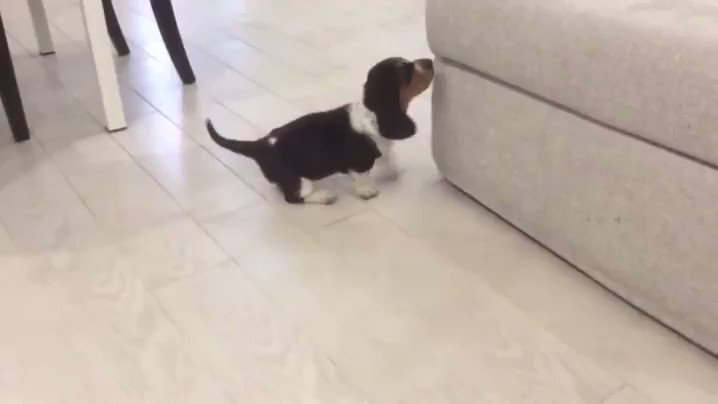

In [147]:
Image('https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg', width = 400, height=200)

### Duddles

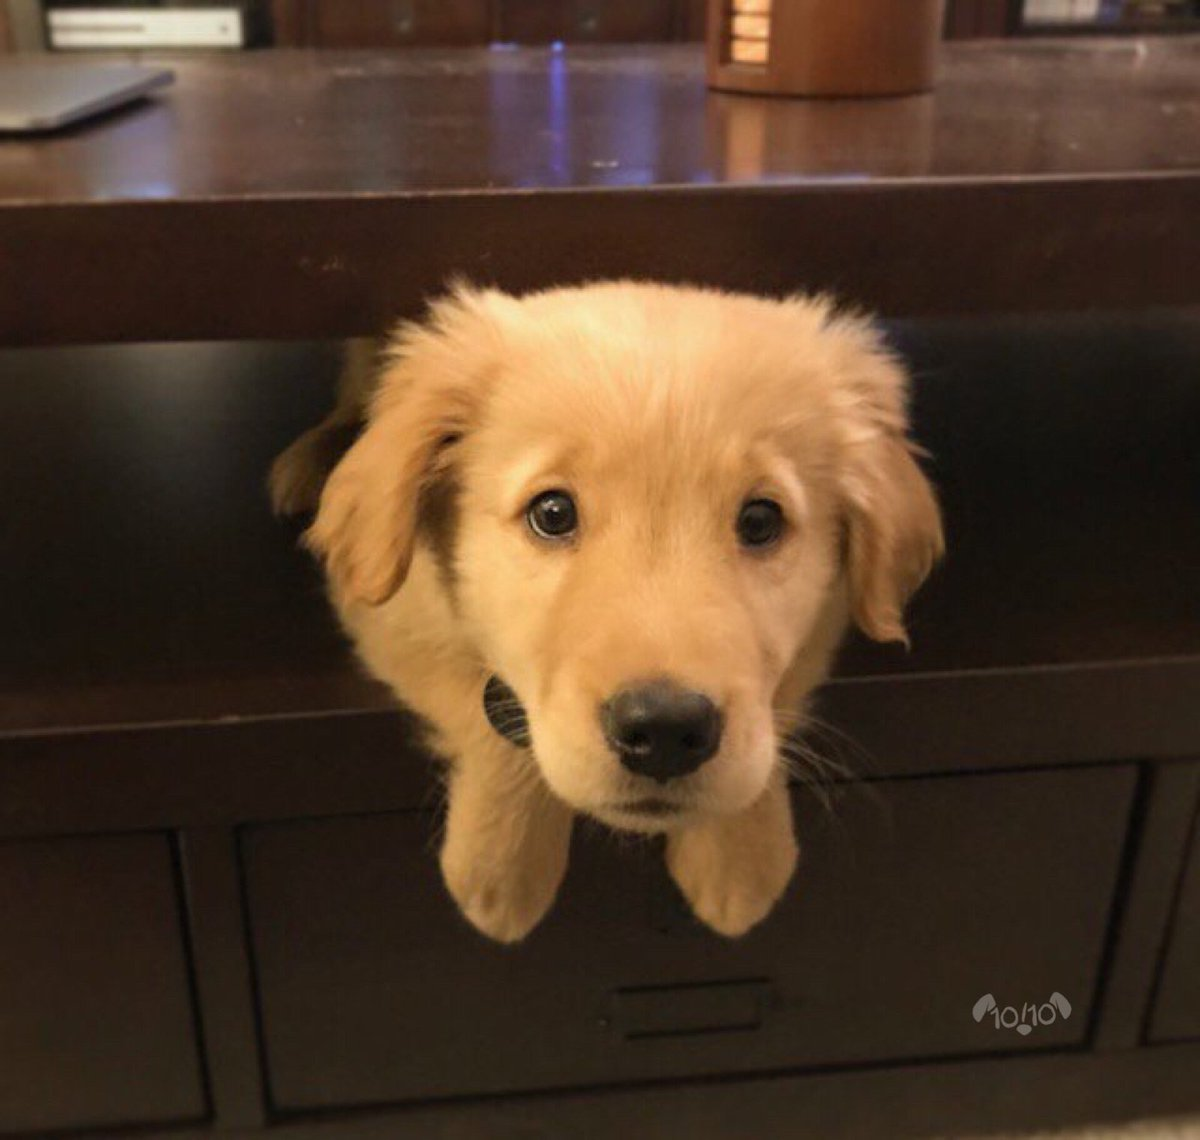

In [148]:
Image('https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg', width = 400, height=200)

### Zoey

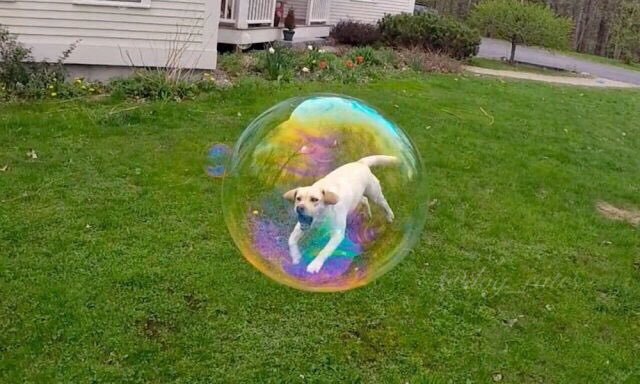

In [151]:
Image('https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg', width = 400, height=200)

### Kenneth

**Insight 2**: The dog named Duddles appears to be the dog with the most favorite count, followed by the dog named Zoey, and Kenneth

## Top 5 Dog breeds with highest favorite_count according to the first prediction (p1)

In [97]:
# Filtering rows confirmed by the first prediction to be true dogs
p1_dog = twitter_master[(twitter_master['p1_dog'] == True)]

In [113]:
# Selecting dog breeds with the most favorite count
df_top_favorite = p1_dog.groupby(['p1'])['favorite_count'].mean().nlargest()
df_top_favorite

p1
saluki                     20821.250
black-and-tan_coonhound    14683.500
giant_schnauzer            14674.500
flat-coated_retriever      14532.625
english_springer           14386.000
Name: favorite_count, dtype: float64

**Insight 3**: The **Saluki** appears to be dog breed with the most favorite count followed by **black-and-tan_coonhound** and **giant_schnauzer**

### Visualization

In [114]:
# Top 5 Dog breeds with highest favorite_count according to the first prediction (p1)
fig = px.bar(df_top_favorite, x='favorite_count', title='Top 5 Dog breeds with Most Favorite Count')
fig.show()

In [146]:
# Plotting a scatter plot for retweet_count against favorite_count
fig = px.scatter(twitter_master, y='retweet_count', x='favorite_count', color="p1",
                 title='The Relationship of Retweet counts to Favorite counts')
fig.show()

#### Retweet counts and Favorite counts appears to have a positive correlation. That means the number of retweets increase as the number of favorites increases